In [2]:
from fastai.vision.all import *
from nbdev import *

In [1]:
# path = data = untar_data(URLs.PETS)
path = Path('/root/.fastai/data/oxford-iiit-pet')

Path.BASE_PATH = path

print (path.ls())

pets = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224,min_scale=0.75),
)

dls = pets.dataloaders(path/'images')

# print (pets.summary(path/'images'))

learn = cnn_learner(dls,resnet34,metrics=error_rate)

learn.fine_tune(1)

[Path('images'), Path('annotations')]


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.516923,0.367369,0.124493,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.504953,0.277389,0.091340,01:09


In [3]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.327755,0.295156,0.085927,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.356079,0.258648,0.078484,01:10


In [3]:
type(learn.recorder.values)

list

In [12]:
output = learn.recorder.values

In [13]:
len(output)

1

In [14]:
output

[(#3) [0.3402560353279114,0.22170813381671906,0.07780785113573074]]

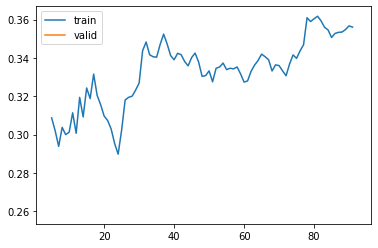

In [5]:
learn.recorder.plot_loss()

In [9]:
learn.recorder.values

[(#3) [0.3560785949230194,0.2586478888988495,0.0784844383597374]]